In [ ]:
! git clone https://github.com/lauracarbaugh/DS-3001-Project.git

Cloning into 'DS-3001-Project'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 608.46 KiB | 6.76 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
cd DS-3001-Project/

/content/DS-3001-Project


In [ ]:
cd data

/content/DS-3001-Project/data


In [ ]:
ls

processed.cleveland.data  processed.switzerland.data
processed.hungarian.data  processed.va.data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Read in the Data

In [ ]:
csv_files = ['processed.cleveland.data', 'processed.hungarian.data', 'processed.switzerland.data', 'processed.va.data']
factors = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
dfs = []

for file in csv_files:
    df = pd.read_csv(file, names=factors, na_values='?')
    dfs.append(df)

data = pd.concat(dfs, ignore_index=False)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Data Cleaning

In [ ]:
# Checking for NAs in the data
print(data.isna().sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
data.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
# Handle the NAs
data['trestbps'].fillna(data['trestbps'].median(), inplace=True)
data['chol'].fillna(data['chol'].median(), inplace=True)
data['fbs'].fillna(data['fbs'].mode()[0], inplace=True)
data['restecg'].fillna(data['restecg'].mode()[0], inplace=True)
data['thalach'].fillna(data['thalach'].median(), inplace=True)
data['exang'].fillna(data['exang'].mode()[0], inplace=True)
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)
data['slope'].fillna(data['slope'].mode()[0], inplace=True)
data['ca'].fillna(data['ca'].median(), inplace=True)
data['thal'].fillna(data['thal'].mode()[0], inplace=True)

/tmp/ipython-input-462162411.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['trestbps'].fillna(data['trestbps'].median(), inplace=True)
/tmp/ipython-input-462162411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# Clean the target variable
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
# Cast the correct data types
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
binary_cols  = ['sex', 'fbs', 'exang', 'num']
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

data[numeric_cols] = data[numeric_cols].astype(float)
data[binary_cols] = data[binary_cols].astype(int)
data[categorical_cols] = data[categorical_cols].astype('category')
print(data.dtypes)

age          float64
sex            int64
cp          category
trestbps     float64
chol         float64
fbs            int64
restecg     category
thalach      float64
exang          int64
oldpeak      float64
slope       category
ca           float64
thal        category
num            int64
dtype: object


Exploratory Data Analysis

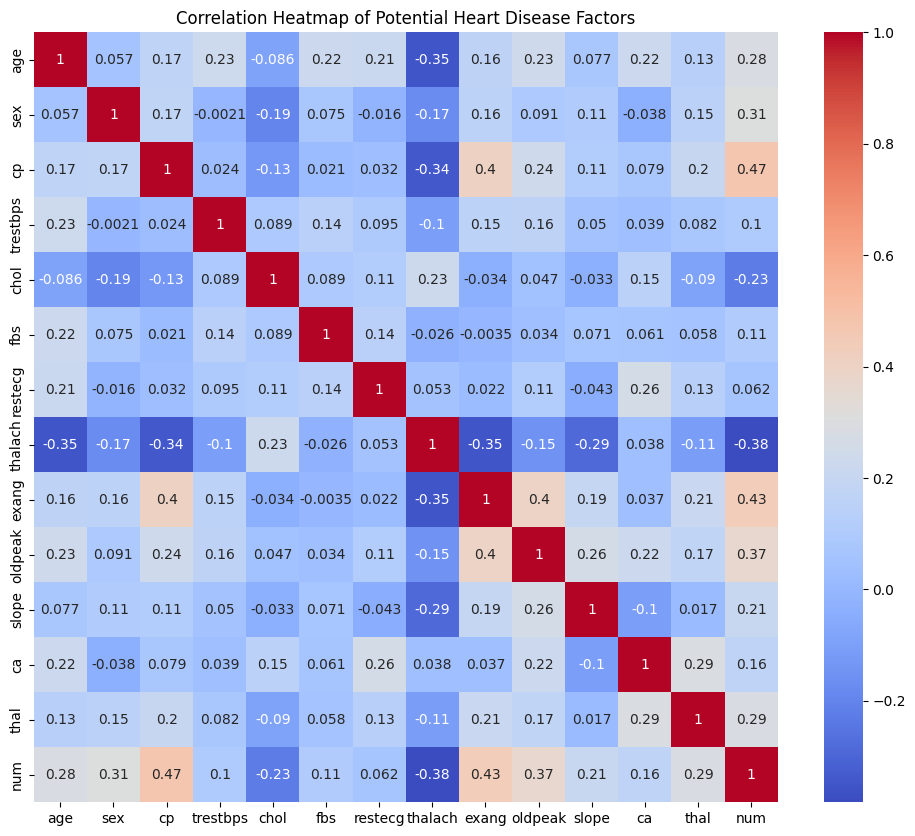

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap of Potential Heart Disease Factors')
plt.show()

In [ ]:
# Numeric Summaries
summaries = data[numeric_cols].describe().round(2)
summaries

,age,trestbps,chol,thalach,oldpeak,ca
count,920.00,920.00,920.00,920.00,920.00,920.00
mean,53.51,132.00,199.91,137.69,0.85,0.23
std,9.42,18.45,109.04,25.15,1.06,0.63
min,28.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,177.75,120.00,0.00,0.00
50%,54.00,130.00,223.00,140.00,0.50,0.00
75%,60.00,140.00,267.00,156.00,1.50,0.00
max,77.00,200.00,603.00,202.00,6.20,3.00


In [ ]:
# Categorical Summaries
categorical  = ['sex', 'fbs', 'exang', 'num', 'cp', 'restecg', 'slope', 'thal']

for factor in categorical:
    counts = data[factor].value_counts()
    print(counts)
    print('\n')

sex
1    726
0    194
Name: count, dtype: int64


fbs
0    782
1    138
Name: count, dtype: int64


exang
0    583
1    337
Name: count, dtype: int64


num
1    509
0    411
Name: count, dtype: int64


cp
4.0    496
3.0    204
2.0    174
1.0     46
Name: count, dtype: int64


restecg
0.0    553
2.0    188
1.0    179
Name: count, dtype: int64


slope
2.0    654
1.0    203
3.0     63
Name: count, dtype: int64


thal
3.0    682
7.0    192
6.0     46
Name: count, dtype: int64




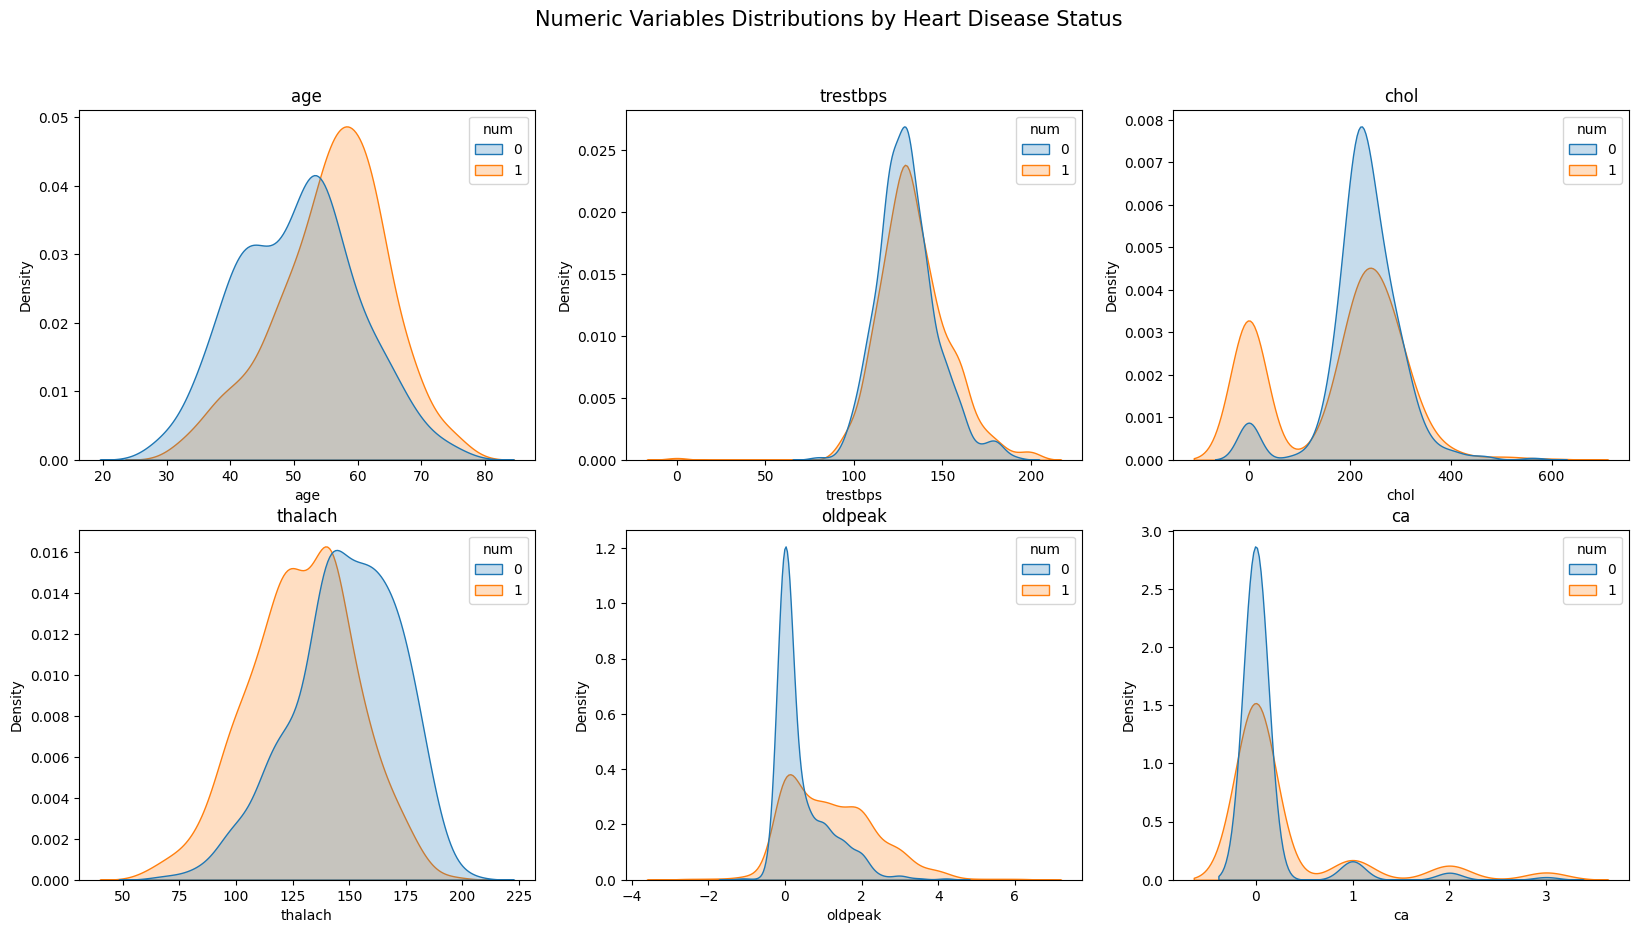

In [ ]:
# Numeric Variable Distributions
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=data, x=col, hue="num", fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_ylabel("Density")

plt.suptitle("Numeric Variables Distributions by Heart Disease Status", fontsize=15)
plt.show()

**Model Analysis**

In [ ]:
## Train/test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score

X = data.drop(columns=['num'])
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Sensitivity and Specificity
def sensitivity_specificity(conf):
    TN, FP, FN, TP = conf.ravel()
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    return sensitivity, specificity

In [ ]:
# Logistic regression with CV hyperparameter tuning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

# Hyperparameter search for Logistic Regression using 5-fold CV
penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10]

best_log_score = -1
best_log_model = None
best_log_params = None

for pen in penalties:
    for C in C_values:
        # liblinear supports both l1 and l2
        log_temp = LogisticRegression(
            penalty=pen,
            C=C,
            solver='liblinear',
            max_iter=1000
        )
        scores = cross_val_score(
            log_temp,
            X_train_scaled,
            y_train,
            cv=5,
            scoring='roc_auc'
        )
        mean_score = scores.mean()
        print(f"LogReg penalty={pen}, C={C}, CV AUC={mean_score:.3f}")

        if mean_score > best_log_score:
            best_log_score = mean_score
            best_log_model = log_temp
            best_log_params = (pen, C)

print("Best Logistic Regression params:", best_log_params)
print("Best CV AUC (LogReg):", round(best_log_score, 3))

# Fit best Logistic Regression on full training data
log_reg = best_log_model
log_reg.fit(X_train_scaled, y_train)

# Test set performance
log_pred = log_reg.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_pred)
log_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

log_conf = confusion_matrix(y_test, log_pred)
log_sens, log_spec = sensitivity_specificity(log_conf)
log_auc = roc_auc_score(y_test, log_probs)

print("\nLogistic Regression Test Accuracy:", log_acc)
print("Confusion Matrix:\n", log_conf)
print("Sensitivity:", log_sens)
print("Specificity:", log_spec)
print("AUC:", log_auc)


LogReg penalty=l1, C=0.01, CV AUC=0.815
LogReg penalty=l1, C=0.1, CV AUC=0.883
LogReg penalty=l1, C=1, CV AUC=0.883
LogReg penalty=l1, C=10, CV AUC=0.883
LogReg penalty=l2, C=0.01, CV AUC=0.888
LogReg penalty=l2, C=0.1, CV AUC=0.885
LogReg penalty=l2, C=1, CV AUC=0.883
LogReg penalty=l2, C=10, CV AUC=0.883
Best Logistic Regression params: ('l2', 0.01)
Best CV AUC (LogReg): 0.888

Logistic Regression Test Accuracy: 0.7880434782608695
Confusion Matrix:
 [[60 20]
 [19 85]]
Sensitivity: 0.8173076923076923
Specificity: 0.75
AUC: 0.871875


In [ ]:
# kNN - choosing k through CV
from sklearn.neighbors import KNeighborsClassifier

k_values = [2, 4, 6, 8, 10]
best_k_score = -1
best_k = None

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn_temp,
        X_train_scaled,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    mean_score = scores.mean()
    print(f"kNN k={k}, CV accuracy={mean_score:.3f}")

    if mean_score > best_k_score:
        best_k_score = mean_score
        best_k = k

print("Best k for kNN:", best_k)
print("Best CV accuracy (kNN):", round(best_k_score, 3))

# Fit best kNN on full training data
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]

knn_conf = confusion_matrix(y_test, knn_pred)
knn_sens, knn_spec = sensitivity_specificity(knn_conf)
knn_auc = roc_auc_score(y_test, knn_probs)

print("\nkNN Test Accuracy:", knn_acc)
print("Confusion Matrix:\n", knn_conf)
print("Sensitivity:", knn_sens)
print("Specificity:", knn_spec)
print("AUC:", knn_auc)


kNN k=2, CV accuracy=0.755
kNN k=4, CV accuracy=0.792
kNN k=6, CV accuracy=0.807
kNN k=8, CV accuracy=0.808
kNN k=10, CV accuracy=0.814
Best k for kNN: 10
Best CV accuracy (kNN): 0.814

kNN Test Accuracy: 0.7934782608695652
Confusion Matrix:
 [[59 21]
 [17 87]]
Sensitivity: 0.8365384615384616
Specificity: 0.7375
AUC: 0.8493990384615384


In [ ]:
# Decision Tree - tune max_depth with cv
from sklearn.tree import DecisionTreeClassifier

depth_values = [None, 2, 4, 6, 8, 10]
best_tree_score = -1
best_depth = None

for d in depth_values:
    tree_temp = DecisionTreeClassifier(max_depth=d, random_state=0)
    scores = cross_val_score(
        tree_temp,
        X_train,
        y_train,
        cv=5,
        scoring='roc_auc'
    )
    mean_score = scores.mean()
    print(f"Tree max_depth={d}, CV AUC={mean_score:.3f}")

    if mean_score > best_tree_score:
        best_tree_score = mean_score
        best_depth = d

print("Best max_depth for Decision Tree:", best_depth)
print("Best CV AUC (Tree):", round(best_tree_score, 3))

# Fit best Decision Tree on full training data
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
tree_probs = tree.predict_proba(X_test)[:, 1]

tree_conf = confusion_matrix(y_test, tree_pred)
tree_sens, tree_spec = sensitivity_specificity(tree_conf)
tree_auc = roc_auc_score(y_test, tree_probs)

print("\nDecision Tree Test Accuracy:", tree_acc)
print("Confusion Matrix:\n", tree_conf)
print("Sensitivity:", tree_sens)
print("Specificity:", tree_spec)
print("AUC:", tree_auc)


Tree max_depth=None, CV AUC=0.716
Tree max_depth=2, CV AUC=0.796
Tree max_depth=4, CV AUC=0.827
Tree max_depth=6, CV AUC=0.784
Tree max_depth=8, CV AUC=0.762
Tree max_depth=10, CV AUC=0.702
Best max_depth for Decision Tree: 4
Best CV AUC (Tree): 0.827

Decision Tree Test Accuracy: 0.7771739130434783
Confusion Matrix:
 [[54 26]
 [15 89]]
Sensitivity: 0.8557692307692307
Specificity: 0.675
AUC: 0.8408653846153846


In [ ]:
# Comparing results - slight changes due to tuning
results = {
    "Model": ["Logistic Regression", "kNN", "Decision Tree"],
    "Accuracy": [log_acc, knn_acc, tree_acc],
    "Sensitivity": [log_sens, knn_sens, tree_sens],
    "Specificity": [log_spec, knn_spec, tree_spec],
    "AUC": [log_auc, knn_auc, tree_auc]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Sensitivity  Specificity       AUC
0  Logistic Regression  0.788043     0.817308       0.7500  0.871875
1                  kNN  0.793478     0.836538       0.7375  0.849399
2        Decision Tree  0.777174     0.855769       0.6750  0.840865


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=0
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

rf_acc = accuracy_score(y_test, rf_pred)
rf_conf = confusion_matrix(y_test, rf_pred)
rf_sens, rf_spec = sensitivity_specificity(rf_conf)
rf_auc = roc_auc_score(y_test, rf_probs)

print("\nRandom Forest Test Accuracy:", rf_acc)
print("Confusion Matrix:\n", rf_conf)
print("Sensitivity:", rf_sens)
print("Specificity:", rf_spec)
print("AUC:", rf_auc)

# Add to comparison table
results_df.loc[len(results_df)] = [
    "Random Forest", rf_acc, rf_sens, rf_spec, rf_auc
]
print("\nUpdated results with Random Forest:")
print(results_df)



Random Forest Test Accuracy: 0.8152173913043478
Confusion Matrix:
 [[60 20]
 [14 90]]
Sensitivity: 0.8653846153846154
Specificity: 0.75
AUC: 0.8704326923076924

Updated results with Random Forest:
                 Model  Accuracy  Sensitivity  Specificity       AUC
0  Logistic Regression  0.788043     0.817308       0.7500  0.871875
1                  kNN  0.793478     0.836538       0.7375  0.849399
2        Decision Tree  0.777174     0.855769       0.6750  0.840865
3        Random Forest  0.815217     0.865385       0.7500  0.870433


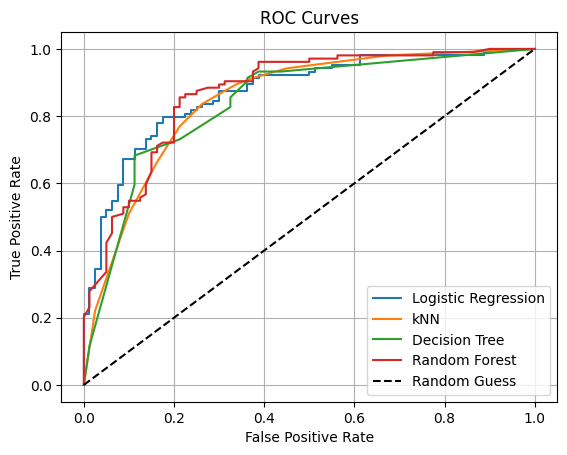

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure()
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression")
plt.plot(knn_fpr, knn_tpr, label=f"kNN")
plt.plot(tree_fpr, tree_tpr, label=f"Decision Tree")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()